In [ ]:
# Code from: https://gist.github.com/rebeccanesson/4789f1abb38dcb08752e877f3dbea415

class Node: 
    
    BLACK = 'B'
    GRAY = 'G'
    WHITE = 'W'
    
    def __init__(self, name, adj_list=None, weighted_adj_list=None): 
        self.name = name
        self.color = Node.WHITE
        self.pi = None
        self.dist = float('inf')
        self.adj_list = adj_list
        if not adj_list: 
            self.adj_list = []
        
    def add_edge(self, node): 
        if node.name not in self.adj_list: 
            self.adj_list.append(node.name)
        
    def remove_edge(self, node): 
        self.adj_list.remove(node.name)
        
    def to_string(self): 
        res = self.name + ': [' + ' '.join(self.adj_list) + '] color: ' + self.color + ' dist: ' + str(self.dist)
        if not self.pi:
            res += ' pi: Nil'
        else: 
            res += ' pi: ' + self.pi
        return res

class Graph: 
    
    def __init__(self, nodes={}): 
        self.nodes = nodes
        
    def add_node(self,node): 
        self.nodes[node.name] = node
        
    def add_edge(self,n1,n2): 
        self.nodes[n1].add_edge(self.nodes[n2])
        
    def remove_edge(self, n1, n2): 
        self.nodes[n1].remove_edge(self.nodes[n2])
        
    def to_string(self): 
        res = ""
        for n in self.nodes.keys(): 
            res += self.nodes[n].to_string() + ", "
        return res
      
g = Graph({})
g.add_node(Node('r', ['s','v']))
g.add_node(Node('s', ['r','w']))
g.add_node(Node('t', ['w','x','u']))
g.add_node(Node('u', ['t','x','y']))
g.add_node(Node('v', ['r']))
g.add_node(Node('w', ['s','t','x']))
g.add_node(Node('x', ['w','t','u','y']))
g.add_node(Node('y', ['u','x']))

print(g.to_string())

#BFS implementation

#Define queue operations
def enqueue(Q,s):
    Q.append(s)

def dequeue(Q):
    return Q.pop(0)

#Implement pseudo-code
def bfs(G,s):
    s.color = Node.GRAY
    s.dist = 0
    s.pi = None
    frontier = [s]
    while frontier:
        u = dequeue(frontier)
        for i in u.adj_list:
            v = G.nodes[i]
            v.color = Node.GRAY
            v.dist = u.dist + 1
            v.pi = u
            enqueue(frontier,v)
        u.color = Node.BLACK

#
first = Graph({})
first.add_node(Node('1', ['2','4']))
first.add_node(Node('2', ['5']))
first.add_node(Node('3', ['6','5']))
first.add_node(Node('4', ['2']))
first.add_node(Node('5', ['4']))
first.add_node(Node('6', ['6']))

bfs(first, first.nodes["3"])
print(first.to_string())

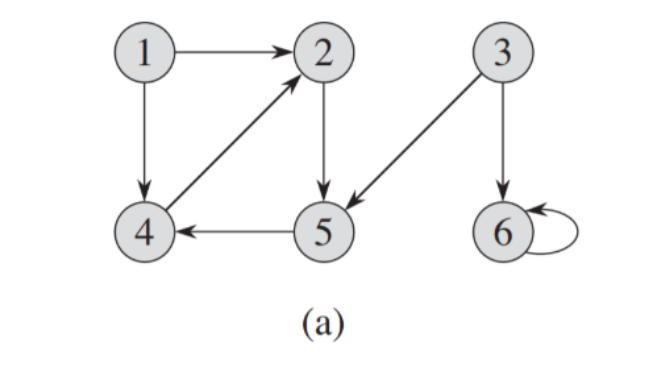

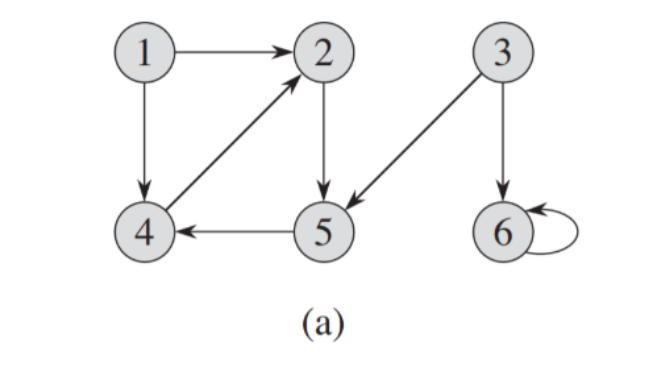